In [76]:
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import os

path = os.path.dirname(os.getcwd()) + '\\functions'
sys.path.insert(0,path)

from datapreper import getdata_qb

In [4]:
trainX, trainy, valX, valy, testX, testy = getdata_qb()

display(trainX.head())
print(trainX.shape)

,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,Int,...,Y/G,QBR,Sk,Yds2,Sk%,NY/A,ANY/A,4QC,GWD,Wins
Player,,,,,,,,,,,,,,,,,,,,,
David Carr,-0.531459,1.183463,1.274291,0.705015,0.757260,0.118799,0.416151,0.255767,-0.145255,0.625661,...,-0.011780,-0.112031,3.321412,3.173703,0.994739,-0.690521,-0.441097,-0.765900,-0.160477,-0.457525
Drew Brees,-0.766786,1.005157,1.121664,0.748372,0.651951,0.491959,0.832888,1.421028,0.860039,-0.012081,...,0.580285,1.126634,0.043569,0.199688,-0.407315,0.663107,0.826628,0.070667,0.512356,1.714668
Damon Huard,1.351157,0.291934,0.358531,0.343711,0.340601,0.230747,0.272684,-0.013139,-0.145255,0.944532,...,0.522260,-0.129982,1.223592,1.245161,0.404400,-0.111667,-0.207153,0.907233,1.185188,0.025185
Philip Rivers,0.409849,1.183463,1.274291,1.499885,1.485267,0.297916,1.742754,1.421028,0.228140,2.060580,...,1.422714,0.404080,0.830251,0.879753,-0.318765,0.658655,0.466228,0.070667,-0.160477,0.990604
Billy Volek,-0.296132,-0.421289,-1.015110,-0.826916,-0.863587,0.365084,-0.790586,-0.640587,0.572812,-0.968694,...,-0.845613,0.974045,-0.743113,-0.673231,0.138748,0.409302,0.621137,0.070667,-0.160477,-0.698880


(805, 26)


In [8]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor()
rf.fit(trainX,trainy)

rf_features = pd.Series(index=trainX.columns,data=rf.feature_importances_).sort_values(ascending=False)
rf_features

TD       0.373301
1D       0.066672
Y/G      0.062458
Age      0.048703
Yds      0.046279
Wins     0.039109
QBR      0.031786
Cmp%     0.028704
Lng      0.022918
ANY/A    0.022894
Yds2     0.021244
Int%     0.021108
TD%      0.020737
NY/A     0.020323
Sk%      0.020032
Y/C      0.019928
Cmp      0.019193
Att      0.018087
GS       0.015126
AY/A     0.014890
Y/A      0.013562
Int      0.012938
GWD      0.012231
Sk       0.011081
G        0.010011
4QC      0.006685
dtype: float64

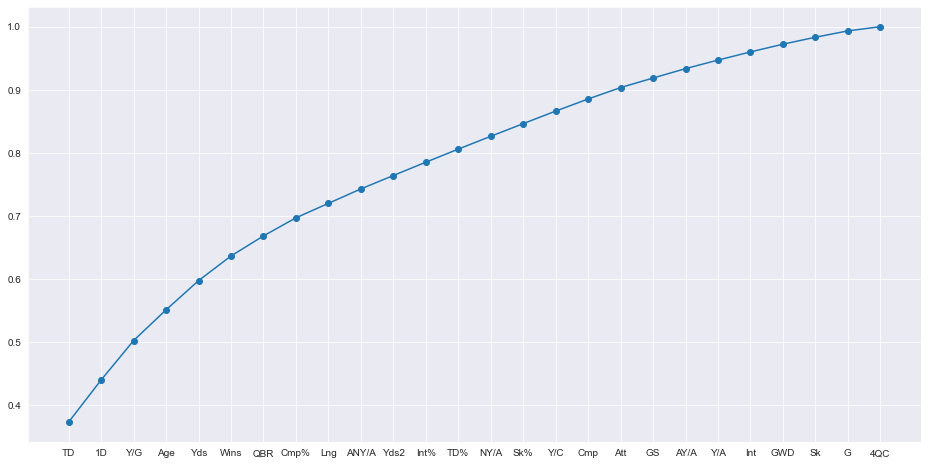

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.plot(rf_features.cumsum())
plt.scatter(rf_features.index,rf_features.cumsum())

In [39]:
from sklearn.linear_model import Lasso
model = Lasso(random_state=75)
model.fit(trainX,trainy)

lasso_features = pd.Series(index=trainX.columns,data=np.abs(model.coef_)).sort_values(ascending=False)
lasso_features

TD       45.018077
Y/G      14.736385
1D       13.273177
Yds      12.667784
GWD      10.792503
Int      10.310501
Age      10.079721
Wins      8.065316
Sk        6.404763
Cmp%      1.859020
Sk%       1.802700
TD%       1.383816
NY/A      1.080356
Int%      0.091143
GS        0.000000
4QC       0.000000
ANY/A     0.000000
Yds2      0.000000
QBR       0.000000
Cmp       0.000000
Y/C       0.000000
AY/A      0.000000
G         0.000000
Lng       0.000000
Att       0.000000
Y/A       0.000000
dtype: float64

In [77]:
from sklearn.linear_model import LinearRegression
from RegscorePy.mallow import mallow
k = len(trainX.columns) + 1
p = 2
mallows_cp = pd.Series(index=trainX.columns,dtype='float64')


model = LinearRegression()
model.fit(trainX,trainy)
fittedvalues = model.predict(trainX)

for column in tqdm(trainX.columns):
    variable = trainX[[column]]
    subModel = LinearRegression()
    subModel.fit(variable, trainy)
    sub_fittedvalues = subModel.predict(variable)

    coef = mallow(trainy, fittedvalues, sub_fittedvalues, k, p)
    mallows_cp.loc[column] = coef

mallows_cp = mallows_cp.sort_values()
mallows_cp

100%|██████████| 26/26 [00:04<00:00,  5.94it/s]


TD        40.839199
Yds       66.670184
1D        68.109343
Cmp       93.766780
Att      124.813407
Wins     146.188468
GS       154.845719
Y/G      207.712881
G        286.190628
GWD      326.910840
Yds2     376.231314
Sk       382.838802
Int      407.469451
Lng      431.499706
4QC      431.884924
QBR      680.978875
ANY/A    730.686221
NY/A     738.229936
AY/A     749.411704
Y/A      761.505790
TD%      773.432918
Cmp%     778.383550
Sk%      795.489575
Int%     812.199234
Y/C      814.645887
Age      823.180366
dtype: float64

In [81]:
feature_selection = pd.concat([rf_features, lasso_features, mallows_cp],axis=1)
feature_selection.rename(columns={0:'Baruta Algorithm',1:'Lasso Selection',2:'Mallows Cp'},inplace=True)
feature_selection

,Baruta Algorithm,Lasso Selection,Mallows Cp
TD,0.373301,45.018077,40.839199
1D,0.066672,13.273177,68.109343
Y/G,0.062458,14.736385,207.712881
Age,0.048703,10.079721,823.180366
Yds,0.046279,12.667784,66.670184
Wins,0.039109,8.065316,146.188468
QBR,0.031786,0.000000,680.978875
Cmp%,0.028704,1.859020,778.383550
Lng,0.022918,0.000000,431.499706
ANY/A,0.022894,0.000000,730.686221


<AxesSubplot:>

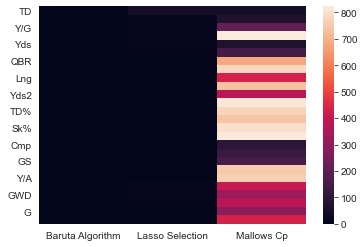

In [82]:
sns.heatmap(feature_selection)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform